# Nueral Network using Keras

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nn_utils
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.17.0


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# Reshape the input from (28, 28) to (784,)
x_train = np.reshape(x_train, (x_train.shape[0], 784))/255.
x_test = np.reshape(x_test, (x_test.shape[0], 784))/255.
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [4]:
# Convert labels to categorical (one-hot encoded)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

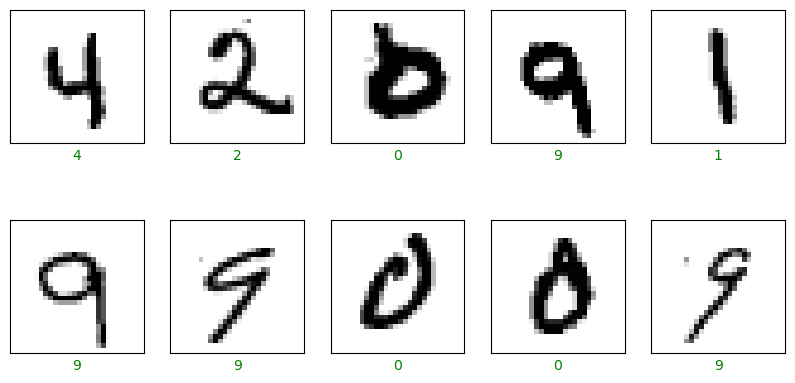

In [5]:
nn_utils.plot_random_examples(x_train,y_train).show()

In [6]:
from tensorflow.keras import layers, models

In [7]:
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')                 
])

In [8]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=3e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    epochs=5, 
                    batch_size=120)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8739 - loss: 0.4276 - val_accuracy: 0.9633 - val_loss: 0.1216
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9687 - loss: 0.1014 - val_accuracy: 0.9695 - val_loss: 0.0969
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9791 - loss: 0.0645 - val_accuracy: 0.9724 - val_loss: 0.0941
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9827 - loss: 0.0540 - val_accuracy: 0.9730 - val_loss: 0.1016
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9868 - loss: 0.0394 - val_accuracy: 0.9736 - val_loss: 0.0890


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9677 - loss: 0.1098
Test accuracy: 0.9735999703407288


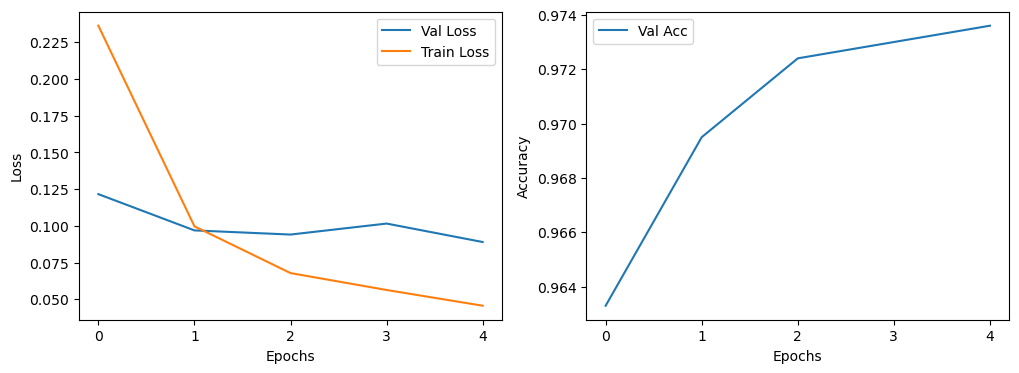

In [12]:
nn_utils.plot_results(history.history).show()

In [13]:
preds = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [14]:
predicted_classes = np.argmax(preds, axis=1)

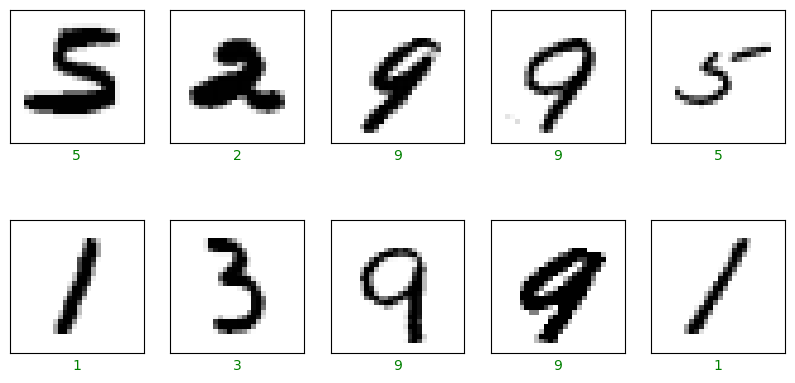

In [16]:
nn_utils.plot_random_examples(x_test,y_test,predicted_classes).show()